In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.metrics import r2_score
import matplotlib.ticker as mticker
from lmfit.models import PowerLawModel

# Global plot parameters
plt.rcParams.update({'font.size':20, 'lines.markersize':9})
plt.rcParams.update({'mathtext.fontset':'cm'})
plt.rcParams.update({'font.family':'Times New Roman'})

In [40]:
def power_fit_lmfit(params, x, y):
        a = params['a']
        b = params['b']
        y_fit = a*x**b
        
        return y_fit-y

def func_powerlaw(x, a, b):
        return a*x**b

def calc_rsquared(x, y, amplitude, exponent):
    yhat = func_powerlaw(x, amplitude, exponent)

    return r2_score(y, yhat)

In [41]:
dataBase_path = r'./'
dataBase_file = r'gabrielli_von_Karman.ods'

In [42]:
data_path = Path(dataBase_path, dataBase_file)
gDF = pd.read_excel(data_path)

In [43]:
# break up the data frame into perspective locomotion modes
modes = gDF['Type'].unique()

g_dfs = [gDF[gDF['Type']==type] for type in modes]

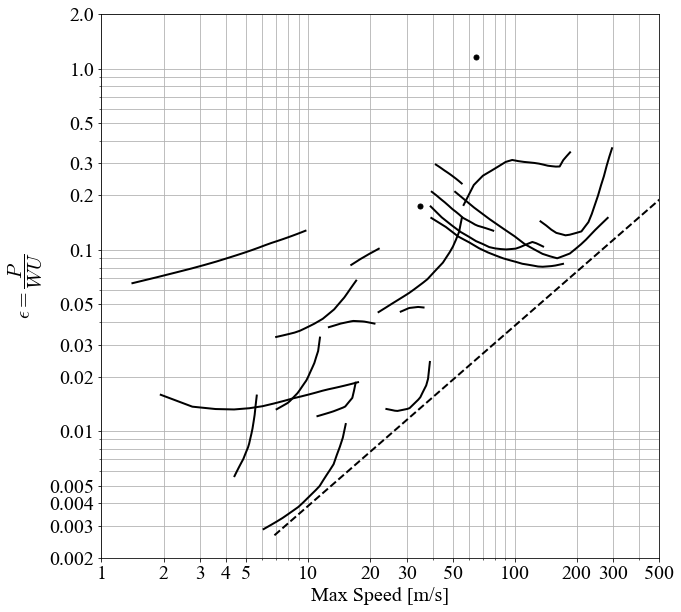

In [62]:
fig1, ax1 = plt.subplots(figsize=(10,10), facecolor='w')


for i, mode in enumerate(modes):
        if g_dfs[i]['Max Speed [m/s]'].values.shape[0] > 1:
                if mode == 'Technology Line':
                        ax1.plot(g_dfs[i]['Max Speed [m/s]'].values, g_dfs[i]['epsilon'].values, 'k--', linewidth=2)
                else:
                        x = g_dfs[i]['Max Speed [m/s]'].values
                        y = g_dfs[i]['epsilon'].values
                        xvals = np.linspace(x[0], x[-1], 20)
                        yinterp = np.interp(xvals, x, y)
                        ax1.plot(xvals, yinterp, 'k', linewidth=2.0)
        else:
                ax1.scatter(g_dfs[i]['Max Speed [m/s]'].values, g_dfs[i]['epsilon'].values, color='k', s=25)

ax1.set_xlabel('Max Speed [m/s]')
ax1.set_ylabel('$\epsilon = \dfrac{P}{WU}$')

ax1.set_xlim([1, 500])
ax1.set_ylim([0.002, 2])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.grid(which='both')

positions = [1, 2, 3, 4, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]
labels = list(map(str, positions))
ax1.xaxis.set_major_locator(mticker.FixedLocator(positions))
ax1.xaxis.set_major_formatter(mticker.FixedFormatter(labels))

positions = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0]
labels = list(map(str, positions))
ax1.yaxis.set_major_locator(mticker.FixedLocator(positions))
ax1.yaxis.set_major_formatter(mticker.FixedFormatter(labels))

fig1.savefig('gabrielli_von_karman.pdf', facecolor='w', dpi=300, bbox_inches='tight')